In [ ]:
import numpy as np
import pandas as pd

# Define some random village names
villages = ["Ha Lejone", "Thaba-Tseka", "Mokhotlong", "Qacha's Nek", "Semonkong"]

# Generate the dataset with added 'village', 'timestamp', and additional columns
data = {
         # Add random village from the list
    "village": np.random.choice(villages, 10),
    
    # Add timestamp for when stats were collected with 12 months interval
    "timestamp": pd.date_range("2024-05-01 08:00", periods=10, freq='M'),
    
    'total_yield': np.random.uniform(2, 10, 10),  # Random total yield in tonnes
    'pesticides_tonnes': np.random.uniform(0.5, 5, 10),  # Random pesticide usage in tonnes
    "rainfall_mm": np.random.uniform(50, 200, 10),
    "temperature_C": np.random.uniform(15, 35, 10),
    "humidity_%": np.random.uniform(40, 90, 10),
    "wind_speed_kmph": np.random.uniform(5, 20, 10),
    "solar_radiation_Wm2": np.random.uniform(300, 800, 10),
    "frost_days": np.random.randint(0, 5, 10),
    
    "soil_ph": np.random.uniform(5.5, 7.5, 10),
    "soil_moisture_%": np.random.uniform(10, 30, 10),
    "soil_nitrogen_ppm": np.random.uniform(20, 80, 10),
    "soil_phosphorus_ppm": np.random.uniform(10, 40, 10),
    "soil_potassium_ppm": np.random.uniform(100, 300, 10),
    "organic_matter_%": np.random.uniform(1, 5, 10),
    
    "crop_type": np.random.choice(["wheat", "maize", "barley"], 10),
    "planting_date": pd.date_range("2024-05-01", periods=10, freq='7D'),
    "fertilizer_kg_per_hectare": np.random.uniform(50, 150, 10),
    "irrigation_mm": np.random.uniform(20, 100, 10),
    "pesticide_use_liters": np.random.uniform(0.5, 2.5, 10),
    
    "NDVI": np.random.uniform(0.2, 0.9, 10),
    "EVI": np.random.uniform(0.2, 0.8, 10),
    "SAVI": np.random.uniform(0.1, 0.7, 10),
    "canopy_temp_C": np.random.uniform(20, 40, 10),
    
    "previous_yield_tonnes": np.random.uniform(1, 5, 10),
    "yield_variability_%": np.random.uniform(5, 25, 10),
    
    "market_price_usd_per_tonne": np.random.uniform(200, 600, 10),
    "demand_forecast_tonnes": np.random.uniform(1000, 5000, 10),
    
    "altitude_m": np.random.uniform(1200, 1800, 10),
    "slope_%": np.random.uniform(0, 15, 10),
    "proximity_to_water_km": np.random.uniform(0.1, 10, 10),
    
    "drought_frequency": np.random.randint(0, 3, 10),
    "heatwave_days": np.random.randint(0, 10, 10),
    "CO2_concentration_ppm": np.random.uniform(380, 420, 10),
    
    # Market analysis columns
    "local_market_demand_tonnes": np.random.uniform(500, 3000, 10),  # Local market demand in tonnes
    "export_market_demand_tonnes": np.random.uniform(200, 1500, 10),  # Export market demand in tonnes
    "local_market_price_Maloti_per_tonne": np.random.uniform(2000, 6000, 10),  # Local price in Maloti per tonne
    "export_market_price_Maloti_per_tonne": np.random.uniform(4000, 8000, 10),  # Export price in Maloti per tonne
    "storage_cost_Maloti_per_month": np.random.uniform(100, 500, 10),  # Storage cost per tonne per month in Maloti
    "transport_cost_Maloti_per_km": np.random.uniform(10, 50, 10),  # Transportation cost per km in Maloti
    "profit_margin_%": np.random.uniform(5, 30, 10),  # Profit margin as percentage
    "supply_vs_demand_ratio": np.random.uniform(0.5, 1.5, 10),  # Supply-to-demand ratio
}

# Convert data to DataFrame
df = pd.DataFrame(data)


# Display the DataFrame
print(list(df.columns.tolist()))


In [ ]:
api_key = "5f0e1b73df2460571aa603479ec880fd"
lat,lon = -29.306648627717433, 27.48550715214183
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}"


In [ ]:
import requests

data = requests.get(url)
print(data)

In [ ]:
data.json()

In [ ]:
import requests
import datetime

def get_historical_weather(latitude, longitude, start_date, end_date):
    # Open-Meteo API URL
    base_url = "https://archive-api.open-meteo.com/v1/era5"

    # Format the request parameters
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "temperature_2m_max": "true",
        "temperature_2m_min": "true",
        "precipitation_sum": "true",
        "wind_speed_max": "true",
        "timezone": "auto"
    }

    # Send request to Open-Meteo API
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return f"Error: {response.status_code}, {response.text}"

# Helper function to iterate over the past 4 years
def fetch_past_4_years_weather(latitude, longitude):
    # Get today's date
    today = datetime.date.today()
    data = []
    # Fetch data year by year
    for year_offset in range(4):
        start_date = (today - datetime.timedelta(days=365 * (year_offset + 1))).isoformat()
        end_date = (today - datetime.timedelta(days=365 * year_offset)).isoformat()

        print(f"Fetching data from {start_date} to {end_date}...")
        weather_data = get_historical_weather(latitude, longitude, start_date, end_date)
        
        if isinstance(weather_data, str):
            data.append(weather_data)
            print(weather_data)
        else:
            print(weather_data)  # You can also process or save the data
    return data
    

# Example usage (latitude and longitude for Lesotho)
data = fetch_past_4_years_weather(latitude=-29.6100, longitude=28.2336)


In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Function to get weather data
def get_historical_weather(latitude, longitude, start_date, end_date):
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum&timezone=auto"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for {start_date} to {end_date}")
        return None

# Function to get data for 4 years
def get_data_for_past_4_years(latitude, longitude):
    end_date = datetime.now().date()
    start_date = end_date - timedelta(days=365 * 4)

    # Loop through day by day and collect data month by month
    date_list = pd.date_range(start=start_date, end=end_date, freq='M').tolist()
    
    all_data = []
    for i in range(len(date_list) - 1):
        start = date_list[i].date()
        end = date_list[i + 1].date()
        
        data = get_historical_weather(latitude, longitude, start, end)
        
        if data:
            for day in data['daily']['time']:
                index = data['daily']['time'].index(day)
                daily_data = {
                    'date': day,
                    'temp_max': data['daily']['temperature_2m_max'][index],
                    'temp_min': data['daily']['temperature_2m_min'][index],
                    'precipitation': data['daily']['precipitation_sum'][index]
                }
                all_data.append(daily_data)

    # Convert to DataFrame and save as CSV
    df = pd.DataFrame(all_data)
    df.to_csv('historical_weather_data.csv', index=False)
    print("Data saved to historical_weather_data.csv")

if __name__ == "__main__":
    latitude = 29.76  # Replace with your desired latitude
    longitude = -95.36  # Replace with your desired longitude
    get_data_for_past_4_years(latitude, longitude)


In [12]:
df = pd.read_csv("historical_weather_data.csv")

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Function to get weather data
def get_historical_weather(latitude, longitude, start_date, end_date):
    # Adjust the URL to include required weather parameters
    url = (
        f"https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}"
        f"&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,humidity_2m_mean,wind_speed_10m_max,"
        f"shortwave_radiation_sum,temperature_2m_min,frost_days&timezone=auto"
    )
    
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        # print(f"Failed to retrieve data for {start_date} to {end_date}")
        return None

# Function to get data for 4 years
def get_data_for_past_4_years(latitude, longitude):
    end_date = datetime.now().date()
    start_date = end_date - timedelta(days=365 * 4)

    # Loop through month by month
    date_list = pd.date_range(start=start_date, end=end_date, freq='M').tolist()
    
    all_data = []
    for i in range(len(date_list) - 1):
        start = date_list[i].date()
        end = date_list[i + 1].date()
        
        data = get_historical_weather(latitude, longitude, start, end)
        
        if data:
            for day in data['daily']['time']:
                index = data['daily']['time'].index(day)
                daily_data = {
                    'date': day,
                    'temp_max': data['daily']['temperature_2m_max'][index],
                    'temp_min': data['daily']['temperature_2m_min'][index],
                    'precipitation': data['daily']['precipitation_sum'][index],
                    'humidity': data['daily']['humidity_2m_mean'][index],
                    'wind_speed_max': data['daily']['wind_speed_10m_max'][index],
                    'solar_radiation': data['daily']['shortwave_radiation_sum'][index],
                    'frost_days': data['daily']['frost_days'][index]
                }
                all_data.append(daily_data)

    # Convert to DataFrame and save as CSV
    df = pd.DataFrame(all_data)
    df.to_csv('historical_weather_data.csv', index=False)
    print("Data saved to historical_weather_data.csv")

if __name__ == "__main__":
    latitude = 29.76  # Replace with your desired latitude
    longitude = -95.36  # Replace with your desired longitude
    get_data_for_past_4_years(latitude, longitude)


In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)
# Define some random village names
villages = ["Ha Lejone", "Thaba-Tseka", "Mokhotlong", "Qacha's Nek", "Semonkong"]

# Define crop types
crop_types = ["wheat", "maize", "barley"]

start_date = "2020-01-01"
end_date = "2024-08-31"

# Generate data for all months over a year for each crop type
months = pd.date_range(start=start_date, end=end_date,freq='M')  # 12 months

# Initialize an empty list to collect data for all crop types and months
data_list = []

# Loop through each crop type
for crop in crop_types:
    for month in months:
        # Generate the data for each crop type and month
        data = {
            "village": np.random.choice(villages),
            "timestamp": month,
            "crop_type": crop,
            
            "total_yield": np.random.uniform(2, 10),  # Random total yield in tonnes
            "pesticides_tonnes": np.random.uniform(0.5, 5),  # Random pesticide usage in tonnes
            "rainfall_mm": np.random.uniform(50, 200),
            "temperature_C": np.random.uniform(15, 35),
            "humidity_%": np.random.uniform(40, 90),
            "wind_speed_kmph": np.random.uniform(5, 20),
            "solar_radiation_Wm2": np.random.uniform(300, 800),
            "frost_days": np.random.randint(0, 5),
            "soil_ph": np.random.uniform(5.5, 7.5),
            "soil_moisture_%": np.random.uniform(10, 30),
            "soil_nitrogen_ppm": np.random.uniform(20, 80),
            "soil_phosphorus_ppm": np.random.uniform(10, 40),
            "soil_potassium_ppm": np.random.uniform(100, 300),
            "organic_matter_%": np.random.uniform(1, 5),
            "fertilizer_kg_per_hectare": np.random.uniform(50, 150),
            "irrigation_mm": np.random.uniform(20, 100),
            "pesticide_use_liters": np.random.uniform(0.5, 2.5),
            "NDVI": np.random.uniform(0.2, 0.9),
            "EVI": np.random.uniform(0.2, 0.8),
            "SAVI": np.random.uniform(0.1, 0.7),
            "canopy_temp_C": np.random.uniform(20, 40),
            "previous_yield_tonnes": np.random.uniform(1, 5),
            "yield_variability_%": np.random.uniform(5, 25),
            "market_price_usd_per_tonne": np.random.uniform(200, 600),
            "demand_forecast_tonnes": np.random.uniform(1000, 5000),
            "altitude_m": np.random.uniform(1200, 1800),
            "slope_%": np.random.uniform(0, 15),
            "proximity_to_water_km": np.random.uniform(0.1, 10),
            "drought_frequency": np.random.randint(0, 3),
            "heatwave_days": np.random.randint(0, 10),
            "CO2_concentration_ppm": np.random.uniform(380, 420),
            "planting_date": pd.date_range("2024-05-01", periods=10, freq='7D'),
            
            "local_market_demand_tonnes": np.random.uniform(500, 3000),
            "export_market_demand_tonnes": np.random.uniform(200, 1500),
            "local_market_price_Maloti_per_tonne": np.random.uniform(2000, 6000),
            "export_market_price_Maloti_per_tonne": np.random.uniform(4000, 8000),
            "storage_cost_Maloti_per_month": np.random.uniform(100, 500),
            "transport_cost_Maloti_per_km": np.random.uniform(10, 50),
            "profit_margin_%": np.random.uniform(5, 30),
            "supply_vs_demand_ratio": np.random.uniform(0.5, 1.5)
        }
        
        # Append this crop type and month data to the list
        data_list.append(data)

# Convert the list of data to a DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
print(df.head())
df.to_csv("Yield.csv",index=True)

       village  timestamp crop_type  total_yield  pesticides_tonnes  \
0    Ha Lejone 2020-01-31     wheat     3.506245           3.569902   
1    Semonkong 2020-02-29     wheat     6.808133           3.940382   
2    Ha Lejone 2020-03-31     wheat     8.522856           4.832035   
3   Mokhotlong 2020-04-30     wheat     4.542205           2.219793   
4  Thaba-Tseka 2020-05-31     wheat     2.812346           3.720799   

   rainfall_mm  temperature_C  humidity_%  wind_speed_kmph  \
0    92.326387      29.575550   64.892083        13.498775   
1   190.849031      28.186192   81.022651         8.207105   
2    58.253145      26.609581   76.107448        11.176409   
3   134.978645      20.697187   54.756609         7.344297   
4   171.317505      22.932592   63.497697        14.184229   

   solar_radiation_Wm2  ...  heatwave_days  CO2_concentration_ppm  \
0           602.783227  ...              1             385.233014   
1           778.961946  ...              4             388.775

/tmp/ipykernel_502567/2348380894.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start=start_date, end=end_date,freq='M')  # 12 months


In [ ]:
df.groupby('crop_type').count()

In [ ]:
# Assuming 'df' is your DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle missing values (replace with appropriate method)
df.fillna(value=0, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['crop_type'] = le.fit_transform(df['crop_type'])
df['village'] = le.fit_transform(df['village'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ["timestamp",'total_yield', 'pesticides_tonnes', 'rainfall_mm', 
                      'temperature_C', 'humidity_%', 'wind_speed_kmph', 'solar_radiation_Wm2', 'frost_days',
                      'soil_moisture_%', 'soil_nitrogen_ppm', 'soil_phosphorus_ppm', 'soil_potassium_ppm', 'organic_matter_%',
                      'fertilizer_kg_per_hectare', 'irrigation_mm', 'pesticide_use_liters', 'NDVI', 'EVI', 'SAVI', 'canopy_temp_C',
                      'previous_yield_tonnes', 'yield_variability_%', 'market_price_usd_per_tonne', 'demand_forecast_tonnes',
                      'altitude_m', 'slope_%', 'proximity_to_water_km', 'drought_frequency', 'heatwave_days', 'CO2_concentration_ppm',
                      'local_market_demand_tonnes', 'export_market_demand_tonnes', 'local_market_price_Maloti_per_tonne',
                      'export_market_price_Maloti_per_tonne', 'storage_cost_Maloti_per_month', 'transport_cost_Maloti_per_km',
                      'profit_margin_%', 'supply_vs_demand_ratio'] # List of numerical features

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split into training and testing sets
X = df.drop('total_yield', axis=1)  # Assuming 'total_yield' is the target variable
y = df['total_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Remove 'timestamp' from the scaling process and preprocess separately
numerical_features = ['total_yield', 'pesticides_tonnes', 'rainfall_mm', 
                      'temperature_C', 'humidity_%', 'wind_speed_kmph', 'solar_radiation_Wm2', 'frost_days',
                      'soil_moisture_%', 'soil_nitrogen_ppm', 'soil_phosphorus_ppm', 'soil_potassium_ppm', 'organic_matter_%',
                      'fertilizer_kg_per_hectare', 'irrigation_mm', 'pesticide_use_liters', 'NDVI', 'EVI', 'SAVI', 'canopy_temp_C',
                      'previous_yield_tonnes', 'yield_variability_%', 'market_price_usd_per_tonne', 'demand_forecast_tonnes',
                      'altitude_m', 'slope_%', 'proximity_to_water_km', 'drought_frequency', 'heatwave_days', 'CO2_concentration_ppm',
                      'local_market_demand_tonnes', 'export_market_demand_tonnes', 'local_market_price_Maloti_per_tonne',
                      'export_market_price_Maloti_per_tonne', 'storage_cost_Maloti_per_month', 'transport_cost_Maloti_per_km',
                      'profit_margin_%', 'supply_vs_demand_ratio']

# Convert timestamp to datetime and extract useful components if needed
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_unix'] = df['timestamp'].astype(np.int64) // 10**9

# Scaling numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

# Prepare data for LSTM
sequence_length = 10  # Choose the number of previous time steps to use for prediction

# Create sequences of data
X = []
y = []

for i in range(sequence_length, len(scaled_df)):
    X.append(scaled_df.iloc[i-sequence_length:i].values)  # Sequence of features
    y.append(scaled_df.iloc[i]['total_yield'])  # Target value (e.g., total_yield)

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer, predicting the target value (e.g., total_yield)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32)

# Make predictions
predictions = model.predict(X)


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
X_train.shape

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], X_train.shape[1])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Assuming 'total_yield' is the target variable

In [55]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load your generated data
df = pd.read_csv("Yield_shelile.csv")

# Encode categorical features (village and crop_type)
village_encoder = LabelEncoder()
df['village_encoded'] = village_encoder.fit_transform(df['village'])

crop_encoder = LabelEncoder()
df['crop_type_encoded'] = crop_encoder.fit_transform(df['crop_type'])



In [5]:
# Define numerical features and add encoded categorical features
numerical_features = ['total_yield', 'pesticides_tonnes', 'rainfall_mm', 'temperature_C', 
                      'humidity_%', 'wind_speed_kmph', 'solar_radiation_Wm2', 'frost_days', 
                      'soil_ph', 'soil_moisture_%', 'soil_nitrogen_ppm', 'soil_phosphorus_ppm', 
                      'soil_potassium_ppm', 'organic_matter_%', 'fertilizer_kg_per_hectare', 
                      'irrigation_mm', 'pesticide_use_liters', 'NDVI', 'EVI', 'SAVI', 'canopy_temp_C', 
                      'previous_yield_tonnes', 'yield_variability_%', 'market_price_usd_per_tonne', 
                      'demand_forecast_tonnes', 'altitude_m', 'slope_%', 'proximity_to_water_km', 
                      'drought_frequency', 'heatwave_days', 'CO2_concentration_ppm', 'local_market_demand_tonnes', 
                      'export_market_demand_tonnes', 'local_market_price_Maloti_per_tonne', 
                      'export_market_price_Maloti_per_tonne', 'storage_cost_Maloti_per_month', 
                      'transport_cost_Maloti_per_km', 'profit_margin_%', 'supply_vs_demand_ratio', 
                      'village_encoded', 'crop_type_encoded']

# Scale the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Sort by timestamp to maintain time order
df = df.sort_values(by=['timestamp'])

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length, 0]  # Assuming 'total_yield' is the target (first column)
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)



In [6]:
sequence_length = 30  # Use the past 30 months for prediction
X, y = create_sequences(df[numerical_features].values, sequence_length)

# Reshape the data for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], sequence_length, len(numerical_features)))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer predicting 'total_yield'



/home/ghost/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model and save the training history
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - loss: 1.1019 - val_loss: 0.7144
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.0624 - val_loss: 0.7192
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.0325 - val_loss: 0.7248
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.0200 - val_loss: 0.7306
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8887 - val_loss: 0.7417
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8868 - val_loss: 0.7509
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.9188 - val_loss: 0.7630
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9425 - val_loss: 0.7782
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9106 - val_loss: 0.7928
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.8272 - val_loss: 0.8144


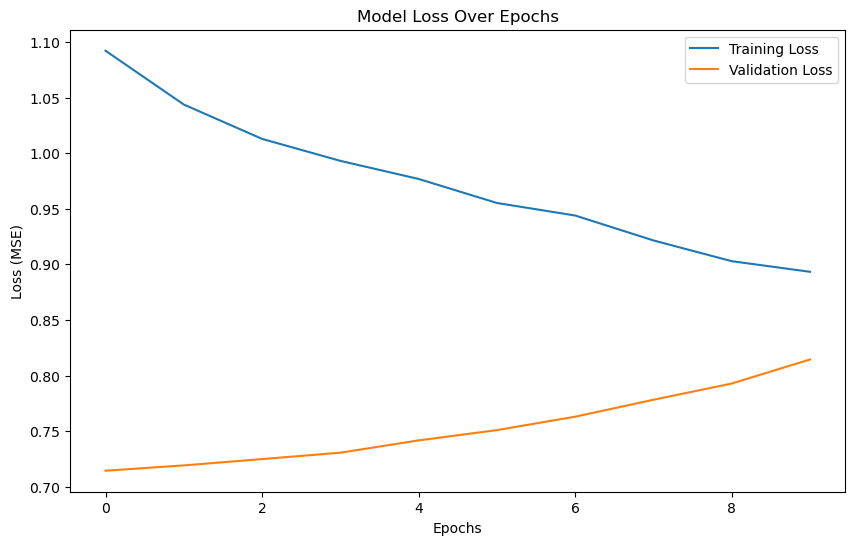

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


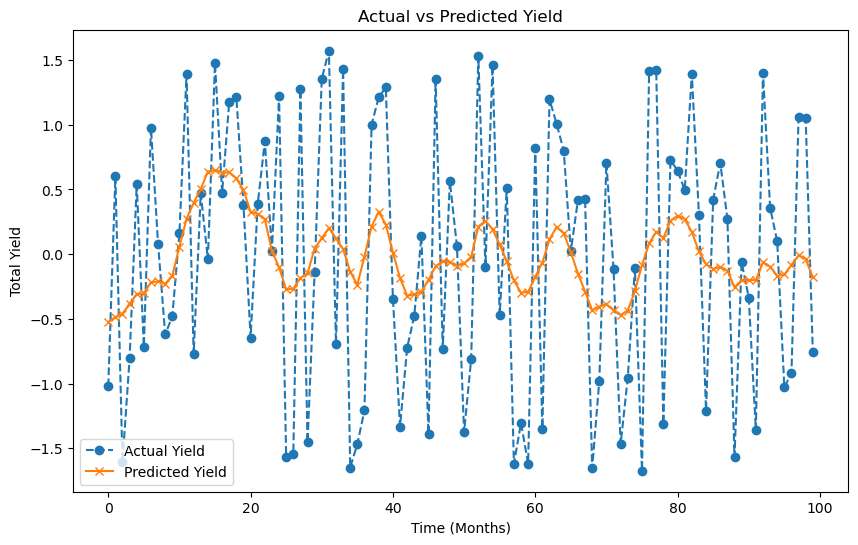

In [8]:
import matplotlib.pyplot as plt
# 1. Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Generate predictions on the training data
y_pred = model.predict(X)

# 2. Plot actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.plot(y[:100], label='Actual Yield', marker='o', linestyle='--')  # Plot only the first 100 points for clarity
plt.plot(y_pred[:100], label='Predicted Yield', marker='x')
plt.title('Actual vs Predicted Yield')
plt.xlabel('Time (Months)')
plt.ylabel('Total Yield')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


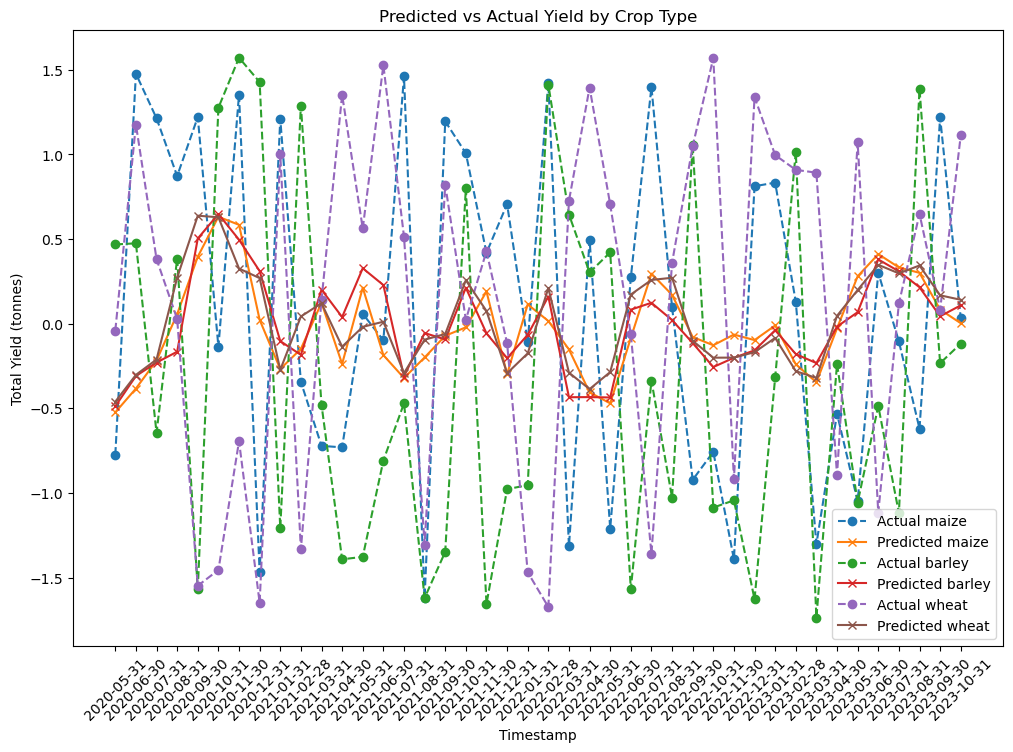

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate LSTM predictions (assuming the model is trained and X is prepared)
y_pred = model.predict(X)

# Step 2: Trim the original data arrays to match the length of y_pred
# The LSTM predictions are made after the sequence_length look-back period
sequence_length = 12  # Example sequence length used for the LSTM model
trimmed_length = len(y_pred)  # Length of predictions

# Step 3: Ensure all arrays are the same length by trimming them
y_trimmed = y[sequence_length:sequence_length + trimmed_length]
timestamp_trimmed = df['timestamp'][sequence_length:sequence_length + trimmed_length]
crop_type_trimmed = df['crop_type'][sequence_length:sequence_length + trimmed_length]

# Check if arrays have the same length
min_length = min(len(y_trimmed), len(timestamp_trimmed), len(crop_type_trimmed), len(y_pred))

# Adjust all arrays to match the shortest length
y_trimmed = y_trimmed[:min_length]
timestamp_trimmed = timestamp_trimmed[:min_length]
crop_type_trimmed = crop_type_trimmed[:min_length]
y_pred = y_pred[:min_length]

# Step 4: Create a DataFrame for predictions and actual values
prediction_df = pd.DataFrame({
    'timestamp': timestamp_trimmed,
    'actual_yield': y_trimmed,
    'predicted_yield': y_pred.flatten(),  # Convert predictions to 1D array
    'crop_type': crop_type_trimmed
})

# Step 5: Plot predicted vs actual yields for each crop type
crop_types = prediction_df['crop_type'].unique()  # Get the unique crop types

plt.figure(figsize=(12, 8))

for crop in crop_types:
    crop_data = prediction_df[prediction_df['crop_type'] == crop]
    plt.plot(crop_data['timestamp'], crop_data['actual_yield'], label=f'Actual {crop}', marker='o', linestyle='--')
    plt.plot(crop_data['timestamp'], crop_data['predicted_yield'], label=f'Predicted {crop}', marker='x')

plt.title('Predicted vs Actual Yield by Crop Type')
plt.xlabel('Timestamp')
plt.ylabel('Total Yield (tonnes)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


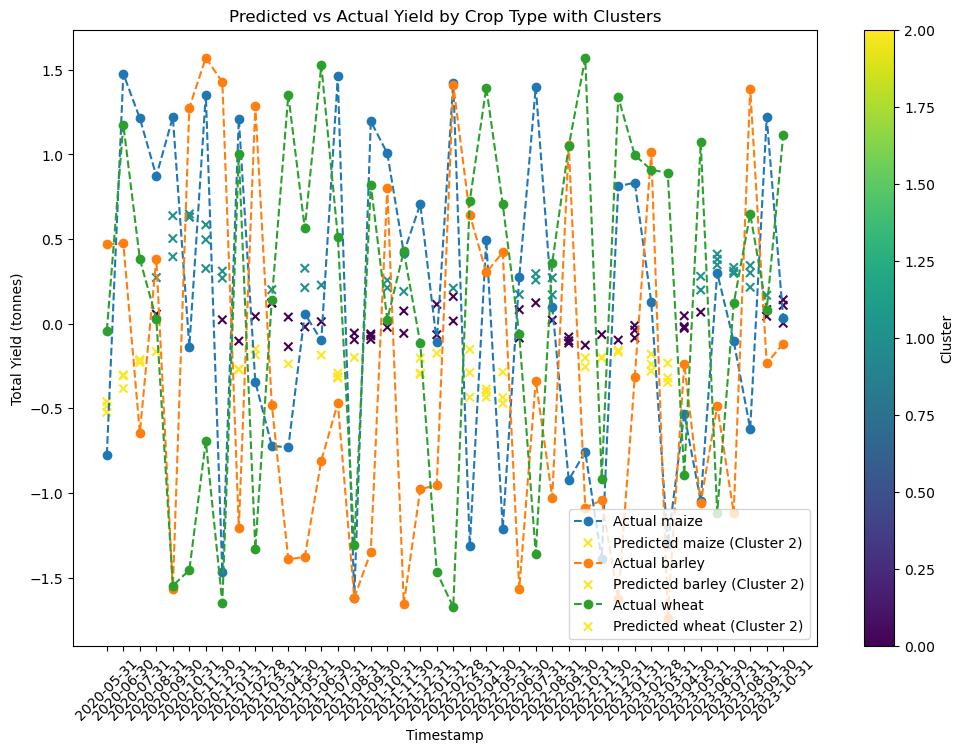

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Generate LSTM predictions (assuming the model is trained and X is prepared)
y_pred = model.predict(X)

# Step 2: Trim the original data arrays to match the length of y_pred
sequence_length = 12  # Example sequence length used for the LSTM model
trimmed_length = len(y_pred)  # Length of predictions

# Step 3: Ensure all arrays are the same length by trimming them
y_trimmed = y[sequence_length:sequence_length + trimmed_length]
timestamp_trimmed = df['timestamp'][sequence_length:sequence_length + trimmed_length]
crop_type_trimmed = df['crop_type'][sequence_length:sequence_length + trimmed_length]

# Check if arrays have the same length
min_length = min(len(y_trimmed), len(timestamp_trimmed), len(crop_type_trimmed), len(y_pred))

# Adjust all arrays to match the shortest length
y_trimmed = y_trimmed[:min_length]
timestamp_trimmed = timestamp_trimmed[:min_length]
crop_type_trimmed = crop_type_trimmed[:min_length]
y_pred = y_pred[:min_length]

# Step 4: Create a DataFrame for predictions and actual values
prediction_df = pd.DataFrame({
    'timestamp': timestamp_trimmed,
    'actual_yield': y_trimmed,
    'predicted_yield': y_pred.flatten(),  # Convert predictions to 1D array
    'crop_type': crop_type_trimmed
})

# Step 5: Apply K-Means Clustering on the predicted yields
scaler = StandardScaler()
scaled_yields = scaler.fit_transform(prediction_df[['predicted_yield']])  # Scale the predicted yields

# Apply K-Means clustering (you can adjust the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
prediction_df['cluster'] = kmeans.fit_predict(scaled_yields)

# Step 6: Plot predicted vs actual yields for each crop type, colored by clusters
crop_types = prediction_df['crop_type'].unique()

plt.figure(figsize=(12, 8))

for crop in crop_types:
    crop_data = prediction_df[prediction_df['crop_type'] == crop]
    
    # Plot actual yield
    plt.plot(crop_data['timestamp'], crop_data['actual_yield'], label=f'Actual {crop}', marker='o', linestyle='--')
    
    # Plot predicted yield, colored by cluster
    plt.scatter(
        crop_data['timestamp'], 
        crop_data['predicted_yield'], 
        label=f'Predicted {crop} (Cluster {crop_data["cluster"].iloc[0]})',
        c=crop_data['cluster'], cmap='viridis', marker='x'
    )

plt.title('Predicted vs Actual Yield by Crop Type with Clusters')
plt.xlabel('Timestamp')
plt.ylabel('Total Yield (tonnes)')
plt.xticks(rotation=45)
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate LSTM predictions (assuming the model is trained and X is prepared)
y_pred = model.predict(X)

# Step 2: Trim the original data arrays to match the length of y_pred
sequence_length = 12  # Example sequence length used for the LSTM model
trimmed_length = len(y_pred)  # Length of predictions

# Ensure all arrays are the same length by trimming them
y_trimmed = y[sequence_length:sequence_length + trimmed_length]
timestamp_trimmed = df['timestamp'][sequence_length:sequence_length + trimmed_length]
crop_type_trimmed = df['crop_type'][sequence_length:sequence_length + trimmed_length]
city_trimmed = df['city'][sequence_length:sequence_length + trimmed_length]  # Assuming 'city' column exists

# Check if arrays have the same length
min_length = min(len(y_trimmed), len(timestamp_trimmed), len(crop_type_trimmed), len(city_trimmed), len(y_pred))

# Adjust all arrays to match the shortest length
y_trimmed = y_trimmed[:min_length]
timestamp_trimmed = timestamp_trimmed[:min_length]
crop_type_trimmed = crop_type_trimmed[:min_length]
city_trimmed = city_trimmed[:min_length]
y_pred = y_pred[:min_length]

# Step 3: Create a DataFrame for predictions and actual values
prediction_df = pd.DataFrame({
    'timestamp': timestamp_trimmed,
    'actual_yield': y_trimmed,
    'predicted_yield': y_pred.flatten(),  # Convert predictions to 1D array
    'crop_type': crop_type_trimmed,
    'city': city_trimmed
})

# Step 4: Apply DBSCAN Clustering on the predicted yields
scaler = StandardScaler()
scaled_yields = scaler.fit_transform(prediction_df[['predicted_yield']])  # Scale the predicted yields

# Apply DBSCAN clustering (you can adjust eps and min_samples based on your data)
dbscan = DBSCAN(eps=0.5, min_samples=5)
prediction_df['cluster'] = dbscan.fit_predict(scaled_yields)

# Step 5: Calculate percentage of points in each cluster
cluster_counts = prediction_df['cluster'].value_counts(normalize=True) * 100
prediction_df['cluster_percentage'] = prediction_df['cluster'].map(cluster_counts)

# Step 6: Plot predicted yields with cluster and city labels
plt.figure(figsize=(12, 8))

# Scatter plot of predicted yield with clusters
scatter = plt.scatter(
    prediction_df['timestamp'], 
    prediction_df['predicted_yield'], 
    c=prediction_df['cluster'], cmap='viridis', marker='x', 
    label='Predicted Yields (Clustered)'
)

# Add city labels
for i, row in prediction_df.iterrows():
    plt.text(row['timestamp'], row['predicted_yield'], row['city'], fontsize=9)

# Plot settings
plt.title('Predicted Yield by City with DBSCAN Clustering and Probability')
plt.xlabel('Timestamp')
plt.ylabel('Predicted Yield (tonnes)')
plt.xticks(rotation=45)
plt.colorbar(scatter, label='Cluster')

# Step 7: Add legend showing percentage probability of each cluster
for cluster, percentage in cluster_counts.items():
    plt.text(0.95, 0.95 - 0.05 * cluster, f'Cluster {cluster}: {percentage:.2f}%', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


KeyError: 'city'

Shapes:
timestamp_trimmed: (138,)
crop_type_trimmed: (138,)
village_trimmed: (138,)
y_trimmed: (126,)
y_pred: (138, 1)


/tmp/ipykernel_485790/4014525562.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'timestamp': timestamp_trimmed[:min_length].ravel(),  # Ensure 1D
/tmp/ipykernel_485790/4014525562.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'crop_type': crop_type_trimmed[:min_length].ravel(),  # Ensure 1D
/tmp/ipykernel_485790/4014525562.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'village': village_trimmed[:min_length].ravel()       # Ensure 1D
/tmp/ipykernel_485790/4014525562.py:51: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterp

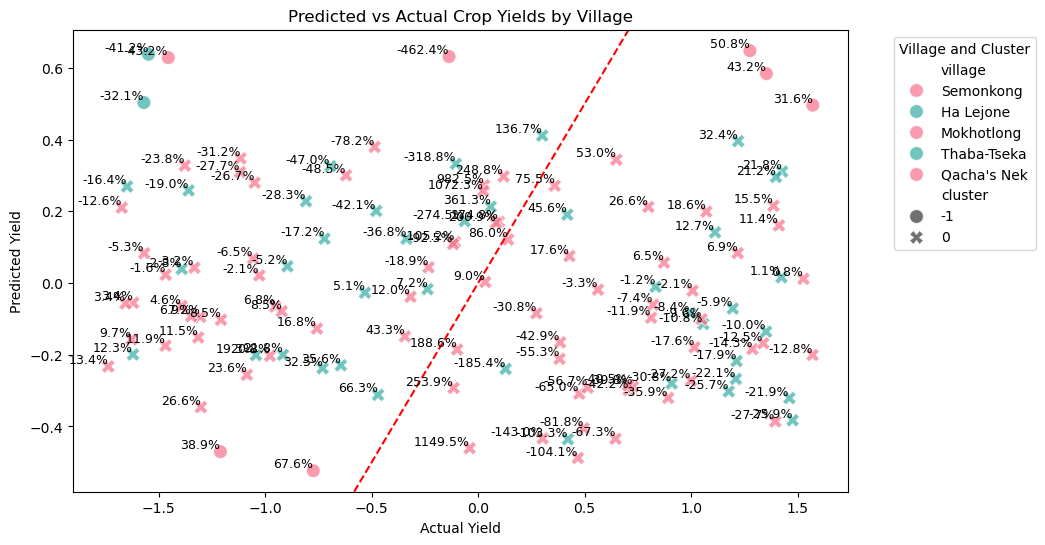

In [18]:
# Trimmed arrays for predictions and actual values
timestamp_trimmed = df['timestamp'][sequence_length:sequence_length + trimmed_length]
crop_type_trimmed = df['crop_type'][sequence_length:sequence_length + trimmed_length]
village_trimmed = df['village'][sequence_length:sequence_length + trimmed_length]

# Check the shape of each array
print("Shapes:")
print("timestamp_trimmed:", timestamp_trimmed.shape)
print("crop_type_trimmed:", crop_type_trimmed.shape)
print("village_trimmed:", village_trimmed.shape)
print("y_trimmed:", y_trimmed.shape)
print("y_pred:", y_pred.shape)

# Ensure all arrays are 1-dimensional
min_length = min(len(y_trimmed), len(timestamp_trimmed), len(crop_type_trimmed), len(village_trimmed), len(y_pred))

# Create DataFrame for predictions and actual values
prediction_df = pd.DataFrame({
    'timestamp': timestamp_trimmed[:min_length].ravel(),  # Ensure 1D
    'actual_yield': y_trimmed[:min_length].ravel(),      # Ensure 1D
    'predicted_yield': y_pred[:min_length].ravel(),      # Ensure 1D
    'crop_type': crop_type_trimmed[:min_length].ravel(),  # Ensure 1D
    'village': village_trimmed[:min_length].ravel()       # Ensure 1D
})

# Apply DBSCAN for clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
features = prediction_df[['actual_yield', 'predicted_yield']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(features_scaled)

# Add clusters to the DataFrame
prediction_df['cluster'] = clusters

# Calculate probability as a percentage of yield increase
prediction_df['yield_probability'] = (prediction_df['predicted_yield'] / prediction_df['actual_yield']) * 100

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(prediction_df['cluster'].unique()))
sns.scatterplot(x='actual_yield', y='predicted_yield', hue='village', style='cluster', 
                data=prediction_df, palette=palette, s=100, alpha=0.7)

# Add annotations for probabilities
for i in range(len(prediction_df)):
    plt.text(prediction_df['actual_yield'].iloc[i], prediction_df['predicted_yield'].iloc[i],
             f"{prediction_df['yield_probability'].iloc[i]:.1f}%", 
             fontsize=9, ha='right', va='bottom')

plt.title('Predicted vs Actual Crop Yields by Village')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Diagonal line for reference
plt.legend(title='Village and Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
